In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, ForeignKey, func, inspect
from sqlalchemy import MetaData
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
# 
import pandas as pd
import numpy as np
import datetime as dt
import os
import csv
# Matplotlib
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [115]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [116]:
conn = engine.connect()
inspector = inspect(engine)

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurments', 'stations']

In [25]:
Measurments = Base.classes.measurments
Stations = Base.classes.stations

In [26]:
session = Session(engine)

In [38]:
prev_year_date = dt.date.today() - dt.timedelta(days=365)
prev_year_date

datetime.date(2017, 5, 9)

In [40]:
# prev_year = dt.date(2017, 5, 9) - dt.timedelta(days=365)
# print(prev_year)

In [39]:
rain=session.query(Measurments.date, Measurments.prcp).filter(Measurments.date > prev_year_date).\
    order_by(Measurments.date).all()
rain

[('2017-05-10', 0.0),
 ('2017-05-10', 0.05),
 ('2017-05-10', 0.0),
 ('2017-05-10', 0.06),
 ('2017-05-10', 0.2),
 ('2017-05-10', 0.55),
 ('2017-05-11', 0.01),
 ('2017-05-11', 0.03),
 ('2017-05-11', 0.0),
 ('2017-05-11', 0.12),
 ('2017-05-11', 0.44),
 ('2017-05-12', 0.0),
 ('2017-05-12', 0.04),
 ('2017-05-12', 0.0),
 ('2017-05-12', 0.02),
 ('2017-05-12', 0.1),
 ('2017-05-13', 0.0),
 ('2017-05-13', 0.02),
 ('2017-05-13', 0.0),
 ('2017-05-13', 0.12),
 ('2017-05-13', 0.1),
 ('2017-05-14', 0.0),
 ('2017-05-14', 0.05),
 ('2017-05-14', 0.0),
 ('2017-05-14', 0.17),
 ('2017-05-14', 1.0),
 ('2017-05-15', 0.05),
 ('2017-05-15', 0.08),
 ('2017-05-15', 0.06),
 ('2017-05-15', 0.09),
 ('2017-05-15', 0.6),
 ('2017-05-16', 0.01),
 ('2017-05-16', 0.03),
 ('2017-05-16', 0.05),
 ('2017-05-16', 0.0),
 ('2017-05-16', 0.03),
 ('2017-05-16', 0.3),
 ('2017-05-17', 0.0),
 ('2017-05-17', 0.02),
 ('2017-05-17', 0.0),
 ('2017-05-17', 0.0),
 ('2017-05-17', 0.07),
 ('2017-05-17', 0.06),
 ('2017-05-18', 0.01),
 ('2017

In [51]:
rain_df = pd.DataFrame(rain)
rain_df.head()

,date,prcp
0,2017-05-10,0.00
1,2017-05-10,0.05
2,2017-05-10,0.00
3,2017-05-10,0.06
4,2017-05-10,0.20


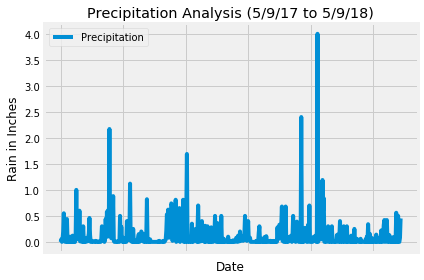

In [52]:
rain_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis (5/9/17 to 5/9/18)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
rain_df.describe()

,prcp
count,545.000000
mean,0.120220
std,0.287541
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.000000


In [75]:
# Total Stations (including nonunique ones)
total_stations = session.query(Stations.station).count()
total_stations

27

In [76]:
total_number_of_stations = session.query(Measurments).group_by(Measurments.station).count()
total_number_of_stations

9

In [80]:
most_active_station = session.query(Measurments.station, Stations.name, func.count(Measurments.tobs)).\
filter(Measurments.station == Stations.station).group_by(Measurments.station).order_by(func.count(Measurments.tobs).desc()).all()
most_active_station

[('USC00519281', 'WAIHEE 837.5, HI US', 8316),
 ('USC00513117', 'KANEOHE 838.1, HI US', 8088),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 8055),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 7716),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 7452),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 5811),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 5796),
 ('USC00517948', 'PEARL CITY, HI US', 2049),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 1026)]

In [101]:
waihee_tobs = session.query(Measurments.tobs).\
filter(Measurments.station == "USC00519281", Measurments.station == Stations.station, Measurments.date >="2017-05-09", Measurments.date <="2018-05-09").\
all()


In [102]:
len(waihee_tobs)

279

In [88]:
print(waihee_tobs[0][0])


67


In [94]:
temperatures = [temp[0] for temp in waihee_tobs]

In [104]:
waihee_tobs_df = pd.DataFrame(waihee_tobs)
waihee_tobs_df.head()

,tobs
0,67
1,67
2,67
3,74
4,74


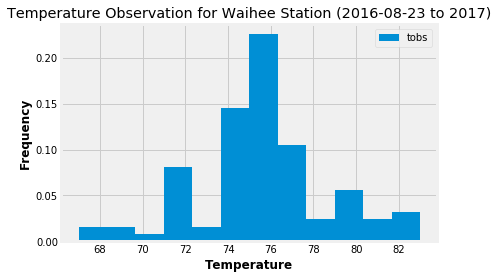

In [110]:
plt.hist(temperatures, normed=True, bins=12)
plt.title("Temperature Observation for Waihee Station (2016-08-23 to 2017)")
plt.ylabel('Frequency', weight='bold')
plt.xlabel('Temperature', weight='bold')
labels = ['tobs']
plt.legend(labels)

In [127]:
def calc_temps(start, end):
    query = session.query(Measurments.waihee_tobs).filter(Measurments.date>=start, Measurments.date<=end).all()
    temperatures = [temp[0] for temp in query]
    avg_temp = np.mean(temperatures)
    lowest_temp = min(temperatures)
    highest_temp = max(temperatures)
    

    plt.figure(figsize=(3,5))
    plt.bar(1, avg_temp, yerr=(highest_temp - lowest_temp), tick_label='', color='salmon')
    plt.ylabel("Temperature", weight="bold")
    plt.title("Average Trip Temperature", weight="bold")
    plt.show()


In [128]:
columns = inspector.get_columns('Measurments')
for column in columns:
    print(column['name'])

id
station
date
prcp
tobs


In [133]:
def calc_temps(start_date,end_date):
    
        start_date_lastyear=(dt.datetime.strptime(start_date, '%Y-%m-%d'))-dt.timedelta(days=365)
        end_date_lastyear=(dt.datetime.strptime(end_date, '%Y-%m-%d'))-dt.timedelta(days=365)
        #print(start_date_lastyear)
    
        #as the temperature is recorded by various stations for a single day, so averaging out the temps
        min_temp=session.query(func.avg(Measurments.tobs)).filter(Measurments.date >=start_date_lastyear).\
        filter(Measurments.date <= end_date_lastyear).group_by(Measurments.date).\
        order_by(func.avg(Measurments.tobs)).first()
        #print(min_temp)
    
        max_temp=session.query(func.avg(Measurments.tobs)).filter(Measurments.date >=start_date_lastyear).\
        filter(Measurments.date <= end_date_lastyear).group_by(Measurments.date).\
        order_by(func.avg(Measurments.tobs).desc()).first()
        #print(max_temp)
    
        avg_temp=session.query(func.avg(Measurments.tobs)).filter(Measurments.date >=start_date_lastyear).\
        filter(Measurments.date <= end_date_lastyear).all()
        
        return min_temp,max_temp,avg_temp
    

start_date='2018-02-05'
end_date='2018-02-10'
min_temp,max_temp,avg_temp=calc_temps(start_date, end_date)
print (min_temp,max_temp,avg_temp)

(63.285714285714285,) (75.16666666666667,) [(67.97058823529412,)]


C:\Users\TFathinejad\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


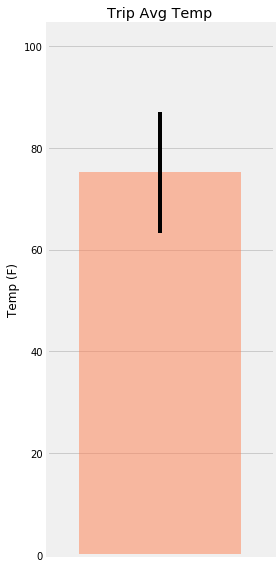

In [134]:
#Boxplot
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
yerr = max_temp[0]-min_temp[0]
bar = ax.bar(xpos, max_temp, yerr=yerr, alpha=0.5, color='coral', align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.2, .2)
# fig.autofmt_xdate()
fig.tight_layout()
fig.show()